In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Melbourne_housing_extra_data.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [5]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             3882
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          3782
Bathroom          3782
Car               3782
Landsize          3804
BuildingArea     10084
YearBuilt         8978
CouncilArea       3806
Lattitude         3670
Longtitude        3670
Regionname           0
Propertycount        0
dtype: int64

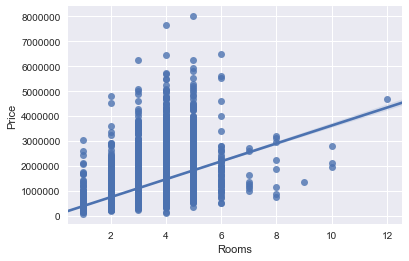

In [6]:
sns.regplot(x='Rooms',y='Price',data=df)

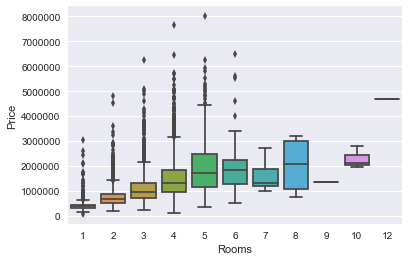

In [8]:
sns.boxplot(x='Rooms',y='Price',data=df)

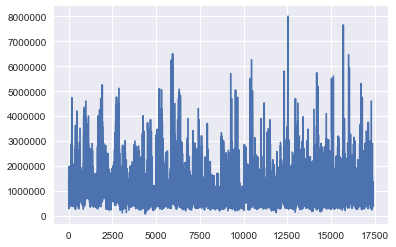

In [9]:
plt.plot(df['Price'])

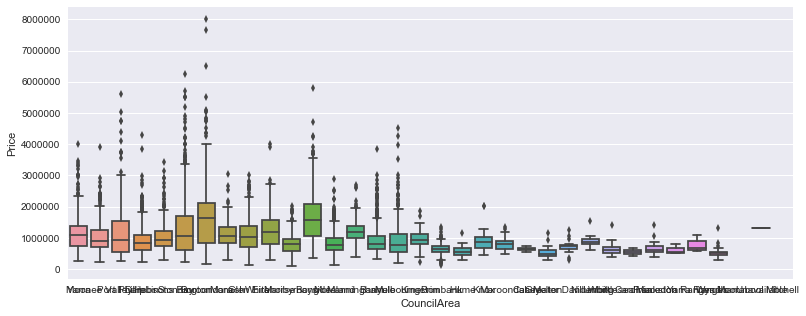

In [10]:
plt.figure(figsize=(13,5))
sns.boxplot(x='CouncilArea',y='Price',data=df)

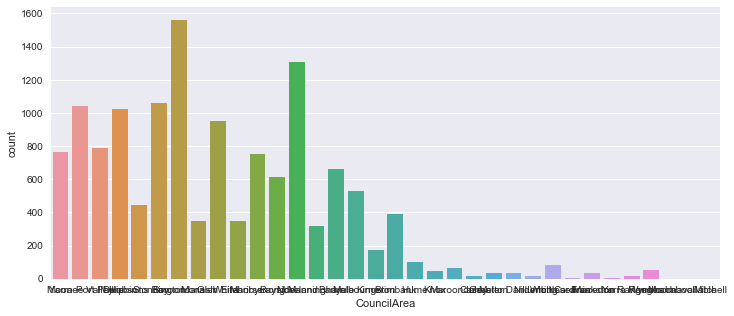

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(df['CouncilArea'])

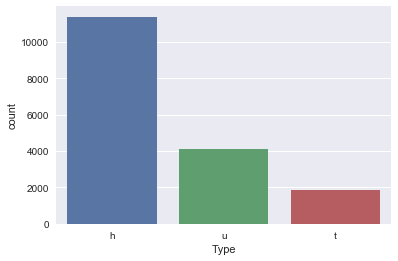

In [12]:
sns.countplot(df['Type'])

In [13]:
#remove data where price is null
df['Price']=df['Price'].fillna(0)

In [14]:
df_test=df[df.Price == 0]

In [15]:
#df = df.price[df.price > 0]
#Drop column where price is zero
df = df.drop(df[df.Price == 0.0].index)

In [22]:
#Using kmeans cluster to cluster the house in 3 set and fill up BuildingArea and Landsize 
#with the mean of that perticular cluster group.We also use cluster as a feature engineering or derived column
cluster=['Rooms','Type','Bedroom2','Bathroom','Landsize','Car','BuildingArea','YearBuilt','Price']
price=df['Price']

In [26]:
km=df[cluster]
km=df.fillna(0)

In [27]:
from sklearn import model_selection, preprocessing
for c in km.columns:
    if km[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(km[c].values)) 
        km[c] = lbl.transform(list(km[c].values))
        

In [28]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(km)
x = model.fit_predict(km)
km["Cluster"]= x

In [29]:
df['Cluster']=km['Cluster']

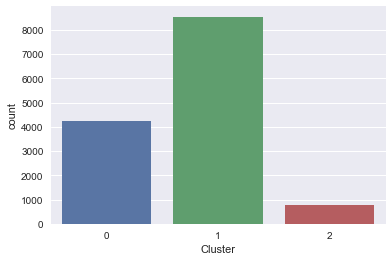

In [30]:
sns.countplot(df['Cluster'])

In [31]:
df=df.replace({'Unavailable': None }, regex=True)

In [34]:
df.BuildingArea=pd.to_numeric(df.BuildingArea)

In [35]:
build_1=np.mean(df.BuildingArea[df.Cluster ==0 ])
build_2=np.mean(df.BuildingArea[df.Cluster ==1 ])
build_3=np.mean(df.BuildingArea[df.Cluster ==2 ])

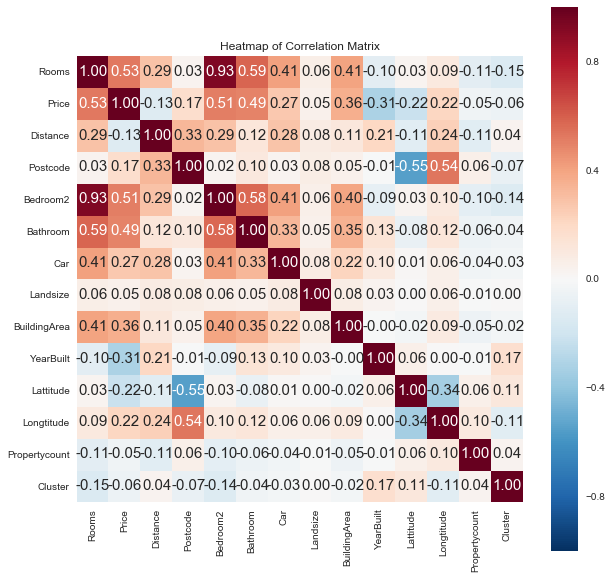

In [37]:
#correlation matrix without kmeans feature engineering
corr=df.corr()
corr = (corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [38]:
df.BuildingArea[df.Cluster ==0]=df.BuildingArea[df.Cluster ==0].fillna(build_1)
df.BuildingArea[df.Cluster ==1]=df.BuildingArea[df.Cluster ==1].fillna(build_2)
df.BuildingArea[df.Cluster ==2]=df.BuildingArea[df.Cluster ==2].fillna(build_3)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df.Landsize=pd.to_numeric(df.Landsize)

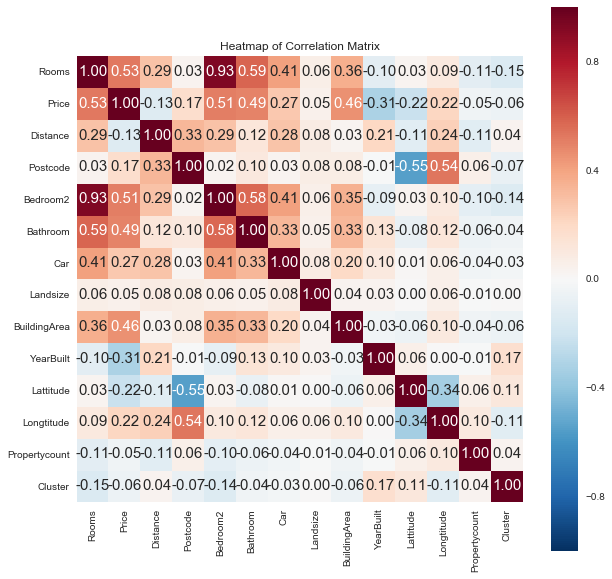

In [41]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [42]:
df.Landsize=pd.to_numeric(df.Landsize)

In [43]:
land_1=np.mean(df.Landsize[df.Cluster ==0 ])
land_2=np.mean(df.Landsize[df.Cluster ==1 ])
land_3=np.mean(df.Landsize[df.Cluster ==2 ])


df.Landsize[df.Cluster ==0]=df.Landsize[df.Cluster ==0].fillna(land_1)
df.Landsize[df.Cluster ==1]=df.Landsize[df.Cluster ==1].fillna(land_2)
df.Landsize[df.Cluster ==2]=df.Landsize[df.Cluster ==2].fillna(land_3)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


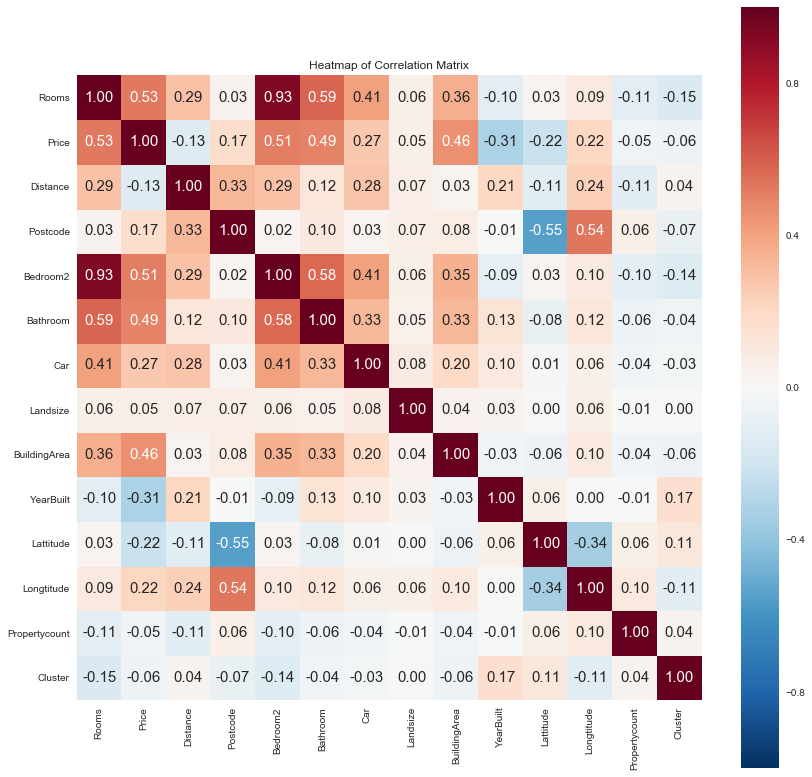

In [44]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [45]:
df.Bedroom2=pd.to_numeric(df.Bedroom2)
df.Bathroom=pd.to_numeric(df.Bathroom)
df.Car=pd.to_numeric(df.Car)

In [46]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
Cluster            int32
dtype: object

In [47]:
df.groupby('CouncilArea')['CouncilArea'].count()

CouncilArea
Banyule               514
Bayside               438
Boroondara           1065
Brimbank              342
Cardinia                2
Casey                  14
Darebin               861
Frankston              25
Glen Eira             791
Greater Dandenong      24
Hobsons Bay           389
Hume                   82
Kingston              151
Knox                   34
Macedon Ranges          3
Manningham            261
Maribyrnong           622
Maroondah              40
Melbourne             436
Melton                 30
Monash                254
Moonee Valley         908
Moreland             1068
Nillumbik              18
Port Phillip          581
Stonnington           661
Whitehorse            245
Whittlesea             75
Wyndham                36
Yarra                 600
Yarra Ranges           10
Name: CouncilArea, dtype: int64

In [48]:
dic={'Banyule':1,'Bayside':2 ,'Boroondara':3 ,'Brimbank':4 ,'Darebin':5,         
'Glen Eira':6,      
'Hobsons Bay':7,      
'Hume':8,              
'Kingston':9,         
'Manningham':10,       
'Maribyrnong':11,      
'Melbourne':12,        
'Monash':13,           
'Moonee Valley':14,    
'Moreland':15,         
'Port Phillip':16,     
'Stonnington':17,      
'Whitehorse':18,       
'Yarra':19} 

In [49]:
df['CouncilArea']=df.CouncilArea.map(dic)

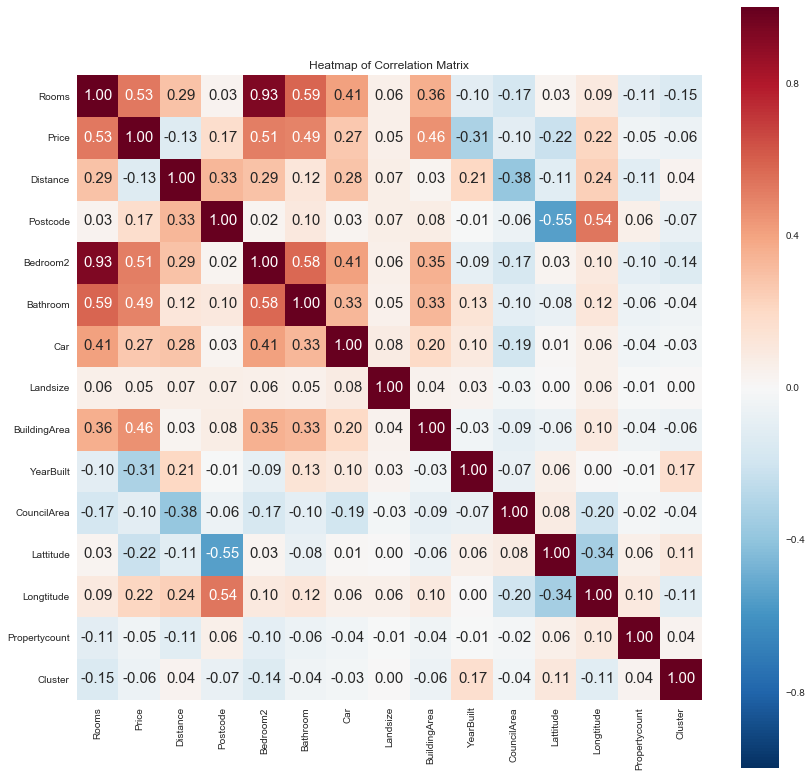

In [50]:
#overall corr matrix with heatmap
corr=df.corr()
corr = (corr)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [51]:
df=df.fillna(0)

In [52]:
df.YearBuilt=pd.to_numeric(df.YearBuilt)

In [53]:
df=df.drop(['Lattitude','Longtitude'],axis=1)

In [54]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
Cluster          0
dtype: int64

In [55]:
from sklearn import model_selection, preprocessing
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))

In [56]:
#split test and train dataset
#Train-Test split
from sklearn.model_selection import train_test_split
label = df.pop('Price')
label=np.log(label)
data_train, data_test, label_train, label_test = train_test_split(df, label, test_size = 0.2, random_state = 500)

In [57]:
#using xgboost as regression model to improve the mdoel accuracy through parameteres tunning
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [59]:
dtrain = xgb.DMatrix(data_train, label_train)

In [60]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[0]	train-rmse:12.5845	test-rmse:12.5845
[50]	train-rmse:0.994798	test-rmse:0.995329
[100]	train-rmse:0.186146	test-rmse:0.196044
[150]	train-rmse:0.154268	test-rmse:0.171935
[200]	train-rmse:0.144728	test-rmse:0.167949
[250]	train-rmse:0.137647	test-rmse:0.1655
[300]	train-rmse:0.131538	test-rmse:0.163907
[350]	train-rmse:0.126366	test-rmse:0.162824
[400]	train-rmse:0.121704	test-rmse:0.161921
[450]	train-rmse:0.117436	test-rmse:0.161323
[500]	train-rmse:0.113759	test-rmse:0.160981
[550]	train-rmse:0.110133	test-rmse:0.160655
[600]	train-rmse:0.106751	test-rmse:0.160468
[650]	train-rmse:0.103576	test-rmse:0.160265
[700]	train-rmse:0.100671	test-rmse:0.160146
[750]	train-rmse:0.0979023	test-rmse:0.160019


In [61]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

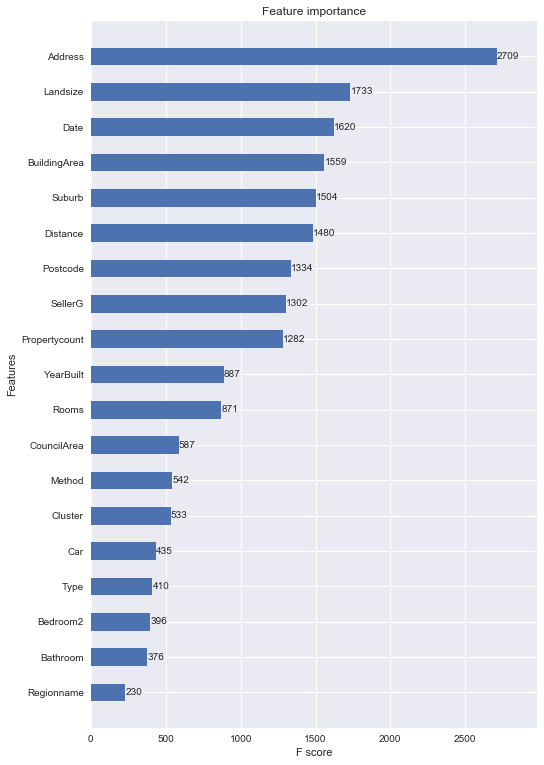

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model,  height=0.5, ax=ax)

In [64]:
dtest=xgb.DMatrix(data_test)

In [65]:
y_predict = np.exp2(model.predict(dtest))

In [66]:
Actual_Price=np.exp2(label_test)

In [67]:
out = pd.DataFrame({'Actual_Price': Actual_Price, 'predict_Price': y_predict,'Diff' :(Actual_Price-y_predict)})

In [68]:
#predicted dataset with actual value
out[['Actual_Price','predict_Price','Diff']].head(10)

,Actual_Price,predict_Price,Diff
8689,11668.594459,13057.086914,-1388.492455
12276,20314.282651,17679.441406,2634.841245
7433,22495.743731,19016.208984,3479.534746
15924,12351.229204,12899.942383,-548.713179
7666,13607.637080,12291.496094,1316.140986
16746,15158.414267,15000.248047,158.166220
16463,21249.280115,19202.656250,2046.623865
14392,22577.745303,23188.494141,-610.748837
1125,19534.889696,22544.119141,-3009.229445
16567,7941.123725,8425.443359,-484.319634


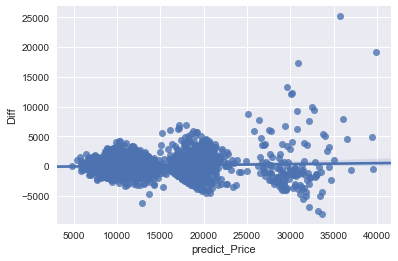

In [69]:
#residual plot
sns.regplot(out['predict_Price'],out['Diff'])

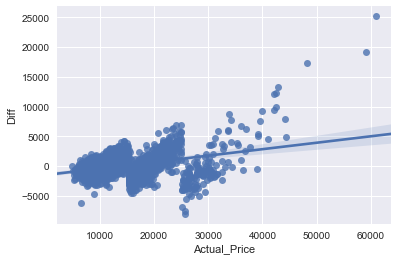

In [70]:
sns.regplot(out['Actual_Price'],out['Diff'])

In [71]:
from sklearn import metrics

In [90]:
df.describe

<bound method NDFrame.describe of        Suburb  Address  Rooms  Type  Method  SellerG  Date  Distance  \
1           0    12798      2     0       1       26    36       2.5   
2           0     6055      2     0       1       26    38       2.5   
4           0     9923      3     0       3       26    39       2.5   
5           0     9160      3     0       0       26    39       2.5   
6           0    10683      4     0       4      155    40       2.5   
10          0     2299      2     0       1      110    43       2.5   
11          0     2252      3     0       1      155    43       2.5   
14          0    13312      2     0       1      155    46       2.5   
15          0     5509      3     0       1      110    46       2.5   
16          0     3892      2     1       1      110    46       2.5   
17          0    11146      1     2       1       26    46       2.5   
18          0     1201      2     0       1       26    46       2.5   
19          0     9221      2 

In [75]:
print("MAE:", metrics.mean_absolute_error(label_test, y_predict))
print('MSE:', metrics.mean_squared_error(label_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(label_test, y_predict)))
print('R-Squared:', )

MAE: 14559.795945
MSE: 242002120.035
RMSE: 15556.4173265


In [76]:
#using tensorflow
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing

import tensorflow as tf

In [77]:
 # Split dataset into train / test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
df, label, test_size=0.2, random_state=42)

In [78]:
# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)

In [102]:
# Build 2 layer fully connected DNN with 10, 10 units respectively.
feature_dfcolumns = [
      tf.feature_column.numeric_column('x', shape=np.array(x_train).shape[1:])]
regressor = tf.contrib.learn.DNNRegressor(
      feature_columns=feature_columns, hidden_units=[10, 10])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x126f975c0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/rq/1hjcqxd13fs2tmyqjl1519nr0000gn/T/tmpd3swzhc5'}


In [105]:
# Train.
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={'x': x_train}, y=y_train, batch_size=1, num_epochs=None, shuffle=True)
regressor.fit(input_fn=train_input_fn, steps=5000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/rq/1hjcqxd13fs2tmyqjl1519nr0000gn/T/tmpd3swzhc5/model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into /var/folders/rq/1hjcqxd13fs2tmyqjl1519nr0000gn/T/tmpd3swzhc5/model.ckpt.
ERROR:tensorflow:Model diverged with loss = NaN.


NanLossDuringTrainingError: NaN loss during training.